In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import urllib.request
import json
from datetime import datetime
import pandas as pd
import ssl
import numpy as np
context = ssl._create_unverified_context()

# COFER
# http://jsonviewer.stack.hu/#http://dataservices.imf.org/REST/SDMX_JSON.svc/DataStructure/COFER
# Dataset information - ['Structure']['KeyFamilies']['KeyFamily']['Annotations']
# Dimension - ['Structure']['KeyFamilies']['KeyFamily']['Components']['Dimension']

# CL_FREQ http://jsonviewer.stack.hu/#http://dataservices.imf.org/REST/SDMX_JSON.svc/CodeList/CL_FREQ
FREQ_A = "A"  # Annual
FREQ_Q = "Q"  # Quarterly

# CL_AREA_COFER http://jsonviewer.stack.hu/#http://dataservices.imf.org/REST/SDMX_JSON.svc/CodeList/CL_AREA_COFER
AREA_W00 = "W00"  # All countries
AREA_XR43 = "XR43"  # Emerging and Developing Countries,
AREA_XR29 = "XR29"  # Advanced Economies

# CL_INDICATOR_COFER http://jsonviewer.stack.hu/#http://dataservices.imf.org/REST/SDMX_JSON.svc/CodeList/CL_INDICATOR_COFER
RAXGFX_USD = "RAXGFX_USD" # Foreign Exchange, US Dollars
RAXGFX_AR_AUD_USD = "RAXGFXARAUD_USD"
RAXGFX_AR_CAD_USD = "RAXGFXARCAD_USD"
RAXGFX_AR_EURO_USD = "RAXGFXAREURO_USD"
RAXGFX_AR_JPY_USD = "RAXGFXARJPY_USD"
RAXGFX_AR_GBP_USD = "RAXGFXARGBP_USD"
RAXGFX_AR_CHF_USD = "RAXGFXARCHF_USD"
RAXGFX_AR_USD_USD = "RAXGFXARUSD_USD"
RAXGFX_AR_OC_USD = "RAXGFXAROC_USD"
RAXGFX_AR_USD = "RAXGFXAR_USD"  # Allocated Reserves, US Dollars
RAXGFX_UR_USD = "RAXGFXUR_USD"  # Unallocated Reserves, US Dollars
RAXGFX_AR_CNY_USD = "RAXGFXARCNY_USD"

# ---------------------------------------------------------------
# Customising the API request
COFER_url = "http://dataservices.imf.org/REST/SDMX_JSON.svc/CompactData/COFER/"
COFER_startPeriod = "1999"
COFER_endPeriod = "2020"
COFER_FREQ = FREQ_Q
COFER_AREA = AREA_W00
COFER_INDICATORS = [RAXGFX_USD,
                    RAXGFX_AR_AUD_USD,
                    RAXGFX_AR_CAD_USD,
                    RAXGFX_AR_EURO_USD,
                    RAXGFX_AR_JPY_USD,
                    RAXGFX_AR_GBP_USD,
                    RAXGFX_AR_CHF_USD,
                    RAXGFX_AR_USD_USD,
                    RAXGFX_AR_OC_USD,
                    RAXGFX_AR_USD,
                    RAXGFX_UR_USD,
                    RAXGFX_AR_CNY_USD]

url = COFER_url \
    + COFER_FREQ \
    + "." + COFER_AREA + "." \
    + ('+'.join(COFER_INDICATORS)) + "?" \
    + "startPeriod=" + COFER_startPeriod + "&" \
    + "endPeriod=" + COFER_endPeriod

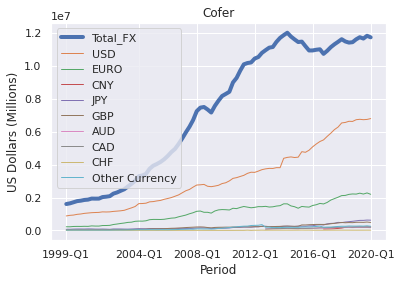

       date            fx  ...     fx_ar_CHF       fx_ar_OC
0   1999-Q1  1.605916e+06  ...   3571.276290   20121.333434
1   1999-Q2  1.646733e+06  ...   3092.356768   20845.130228
2   1999-Q3  1.714089e+06  ...   3193.278202   22554.526124
3   1999-Q4  1.782706e+06  ...   3171.864564   22033.790526
4   2000-Q1  1.809493e+06  ...   3589.773563   21286.306682
..      ...           ...  ...           ...            ...
80  2019-Q1  1.161077e+07  ...  15266.582421  263495.984209
81  2019-Q2  1.173776e+07  ...  15526.319298  270560.563008
82  2019-Q3  1.165682e+07  ...  16198.128341  262919.676072
83  2019-Q4  1.182474e+07  ...  17358.868787  281496.134438
84  2020-Q1  1.173194e+07  ...  16045.964472  255534.360853

[85 rows x 13 columns]


In [6]:
with urllib.request.urlopen(url, context=context) as req:
    odata = json.loads(req.read().decode())
    fx = pd.DataFrame(odata['CompactData']['DataSet']['Series'][0]['Obs'])
    fx_ar_AUD = pd.DataFrame(odata['CompactData']['DataSet']['Series'][1]['Obs'])
    fx_ar_CAD = pd.DataFrame(odata['CompactData']['DataSet']['Series'][2]['Obs'])
    fx_ar_EURO = pd.DataFrame(odata['CompactData']['DataSet']['Series'][3]['Obs'])
    fx_ar_JPY = pd.DataFrame(odata['CompactData']['DataSet']['Series'][4]['Obs'])
    fx_ar_GBP = pd.DataFrame(odata['CompactData']['DataSet']['Series'][5]['Obs'])
    fx_ar_CHF = pd.DataFrame(odata['CompactData']['DataSet']['Series'][6]['Obs'])
    fx_ar_USD = pd.DataFrame(odata['CompactData']['DataSet']['Series'][7]['Obs'])
    fx_ar_OC = pd.DataFrame(odata['CompactData']['DataSet']['Series'][8]['Obs'])
    fx_ar = pd.DataFrame(odata['CompactData']['DataSet']['Series'][9]['Obs'])
    fx_ur = pd.DataFrame(odata['CompactData']['DataSet']['Series'][10]['Obs'])
    fx_ar_CNY = pd.DataFrame(odata['CompactData']['DataSet']['Series'][11]['Obs'])

    fx.columns = ['date','fx']
    fx_ar_AUD.columns = ['date','fx_ar_AUD']
    fx_ar_CAD.columns = ['date','fx_ar_CAD']
    fx_ar_EURO.columns = ['date','fx_ar_EURO']
    fx_ar_JPY.columns = ['date','fx_ar_JPY']
    fx_ar_GBP.columns = ['date','fx_ar_GBP']
    fx_ar_CHF.columns = ['date','fx_ar_CHF']
    fx_ar_USD.columns = ['date','fx_ar_USD']
    fx_ar_OC.columns = ['date','fx_ar_OC']
    fx_ar.columns = ['date','fx_ar']
    fx_ur.columns = ['date','fx_ur']
    fx_ar_CNY.columns = ['date','fx_ar_CNY']
    
    cofer = fx.merge(fx_ar, how='outer').fillna(method='ffill')\
      .merge(fx_ur, how='outer').fillna(method='ffill')\
      .merge(fx_ar_USD, how='outer').fillna(method='ffill')\
      .merge(fx_ar_EURO, how='outer').fillna(method='ffill')\
      .merge(fx_ar_CNY, how='outer').fillna(method='ffill')\
      .merge(fx_ar_JPY, how='outer').fillna(method='ffill')\
      .merge(fx_ar_GBP, how='outer').fillna(method='ffill')\
      .merge(fx_ar_AUD, how='outer').fillna(method='ffill')\
      .merge(fx_ar_CAD, how='outer').fillna(method='ffill')\
      .merge(fx_ar_CHF, how='outer').fillna(method='ffill')\
      .merge(fx_ar_OC, how='outer').fillna(method='ffill')

    # cofer.date = pd.to_datetime(cofer.date)
    cofer.fx = pd.to_numeric(cofer.fx)
    cofer.fx_ar = pd.to_numeric(cofer.fx_ar)
    cofer.fx_ur = pd.to_numeric(cofer.fx_ur)
    cofer.fx_ar_USD = pd.to_numeric(cofer.fx_ar_USD)
    cofer.fx_ar_EURO = pd.to_numeric(cofer.fx_ar_EURO)
    cofer.fx_ar_CNY = pd.to_numeric(cofer.fx_ar_CNY)
    cofer.fx_ar_JPY = pd.to_numeric(cofer.fx_ar_JPY)
    cofer.fx_ar_GBP = pd.to_numeric(cofer.fx_ar_GBP)
    cofer.fx_ar_AUD = pd.to_numeric(cofer.fx_ar_AUD)
    cofer.fx_ar_CAD = pd.to_numeric(cofer.fx_ar_CAD)
    cofer.fx_ar_CHF = pd.to_numeric(cofer.fx_ar_CHF)
    cofer.fx_ar_OC = pd.to_numeric(cofer.fx_ar_OC)

    # Plot COFER
    plt.plot(cofer.date.values.tolist(), cofer.fx.values.tolist(), linewidth=4, alpha=1, label="Total_FX")
    plt.plot(cofer.date.values.tolist(), cofer.fx_ar_USD.values.tolist(), linewidth=1, alpha=1, label="USD")
    plt.plot(cofer.date.values.tolist(), cofer.fx_ar_EURO.values.tolist(), linewidth=1, alpha=1, label="EURO")
    plt.plot(cofer.date.values.tolist(), cofer.fx_ar_CNY.values.tolist(), linewidth=1, alpha=1, label="CNY")
    plt.plot(cofer.date.values.tolist(), cofer.fx_ar_JPY.values.tolist(), linewidth=1, alpha=1, label="JPY")
    plt.plot(cofer.date.values.tolist(), cofer.fx_ar_GBP.values.tolist(), linewidth=1, alpha=1, label="GBP")
    plt.plot(cofer.date.values.tolist(), cofer.fx_ar_AUD.values.tolist(), linewidth=1, alpha=1, label="AUD")
    plt.plot(cofer.date.values.tolist(), cofer.fx_ar_CAD.values.tolist(), linewidth=1, alpha=1, label="CAD")
    plt.plot(cofer.date.values.tolist(), cofer.fx_ar_CHF.values.tolist(), linewidth=1, alpha=1, label="CHF")
    plt.plot(cofer.date.values.tolist(), cofer.fx_ar_OC.values.tolist(), linewidth=1, alpha=1, label="Other Currency")

    plt.title("Cofer")
    plt.xlabel("Period")
    plt.ylabel("US Dollars (Millions)")
    plt.xticks(['1999-Q1','2004-Q1','2008-Q1','2012-Q1','2016-Q1','2020-Q1'])
    plt.legend(loc='upper left')
    plt.show()


    print(cofer)